<a href="https://colab.research.google.com/github/dankook-sw/DataMining/blob/main/project/HW_MNIST_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 학습 실험

수업 시간에 배웠던 손글씨 이미지 분류를 학습하는 실험입니다.

실험의 목적은 하이퍼파라미터를 변경해 테스트 데이터에 대해 최대 정확도를 도출하는 것입니다.

수정할 수 있는 부분은 다음과 같고 나머지 코드 부분은 수정이 불가합니다.
1. 파일 경로
2. 하이퍼 파라미터   
*   iters_num
*   batch_size
*   learning_rate
*   hidden_size

3. accuracy 중간 확인 간격 (if i % 20 == 0:) 의 20. 중간 확인 간격이 짧으면 시간이 오래 걸릴 수 있으므로 조절하여도 됩니다.


제출할 것
1. 본인이 도출한 최대 정확도. jupyter notebook에 수행 결과가 출력된 대로 그대로 제출. (학번.ipynb)
2. 학습 loss 그래프. train_loss_list를 이용해 iteration이 증가함에 따라 loss가 감소하는 양상을 matplotlib을 이용해 그래프로 그려 제출. (코드는 jupyter notebook에 남겨두고, 그래프 캡처하여 pdf 파일에 붙여넣기)
3. 최대 정확도를 도출하기까지 하이퍼파라미터를 어떻게 변경해 보았고 그에 따른 결과가 어땠는지에 대한 분석을 반페이지 분량으로 작성하여 제출. (pdf 파일)

In [ ]:
#### 본인의 디렉터리 경로에 맞게 수정 가능 ######
from google.colab import drive
drive.mount('/content/gdrive/')
#################################################

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#### 본인의 디렉터리 경로에 맞게 수정 가능 ######
import sys
import os
import numpy as np
sys.path.append('/content/gdrive/MyDrive/BDM')  # 구글 드라이브 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient
from keras.datasets import mnist
#################################################

In [ ]:
#################### 수정 불가 ###################
class TwoLayerNet:

    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
#################################################

In [ ]:
if __name__ == '__main__':

  ######### 데이터 로드 부분 수정 불가 ###########
  (x_train, t_train), (x_test, t_test) = mnist.load_data()
  num_train_data = 10000
  num_test_data = 1000
  x_train = x_train[0:num_train_data]
  t_train = t_train[0:num_train_data]
  x_test = x_test[0:num_test_data]
  t_test = t_test[0:num_test_data]
  x_train = x_train.reshape(num_train_data, 784)
  x_test = x_test.reshape(num_test_data, 784)
  t_train = np.eye(10)[t_train]
  t_test = np.eye(10)[t_test]
  #################################################

  ###### [수정할 부분] 하이퍼파라미터 설정#########
  iters_num = 400
  batch_size = 64
  learning_rate = 0.02
  hidden_size =75

  #################################################


  ########### 학습 수행 부분 수정 불가 ############
  # accuracy 중간 확인 간격은 수정 가능 (if i % 20 == 0:)

  network = TwoLayerNet(input_size=784, hidden_size=hidden_size, output_size=10)

  train_loss_list = []
  train_acc_list = []
  test_acc_list = []

  # 1에폭당 반복 수
  train_size = x_train.shape[0]
  iter_per_epoch = max(train_size / batch_size, 1)

  for i in range(iters_num):
      # 미니배치 획득
      batch_mask = np.random.choice(train_size, batch_size)
      x_batch = x_train[batch_mask]
      t_batch = t_train[batch_mask]

      # 기울기 계산
      grad = network.numerical_gradient(x_batch, t_batch)

      # 매개변수 갱신
      for key in ('W1', 'b1', 'W2', 'b2'):
          network.params[key] -= learning_rate * grad[key]

      # 학습 loss 기록
      loss = network.loss(x_batch, t_batch)
      train_loss_list.append(loss)

      # 테스트 loss 기록
      print("iteration: ", i, "     train loss ", loss)

      # 정확도 계산
      if i % 20 == 0:
          train_acc = network.accuracy(x_train, t_train)
          test_acc = network.accuracy(x_test, t_test)
          train_acc_list.append(train_acc)
          test_acc_list.append(test_acc)
          print("train acc, test acc | "
                + str(train_acc) + ", " + str(test_acc))
  #################################################

########## 최종 결과 출력 부분 수정 불가 ########
test_acc = network.accuracy(x_test, t_test)
print("final test accuracy: ", test_acc)
#################################################

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
iteration:  0      train loss  2.286465808965506
train acc, test acc | 0.0967, 0.098
iteration:  1      train loss  2.2753454998424982
iteration:  2      train loss  2.2644491489673473
iteration:  3      train loss  2.241155454548026
iteration:  4      train loss  2.2468398768679543
iteration:  5      train loss  2.2313868740822107
iteration:  6      train loss  2.2278706699254034
iteration:  7      train loss  2.2332914442936582
iteration:  8      train loss  2.2062142280542067
iteration:  9      train loss  2.2085462212141893
iteration:  10      train loss  2.1863925136405955
iteration:  11      train loss  2.2077263460145584
iteration:  12      train loss  2.1425067877988244
iteration:  13      train loss  2.1753861720128063
iteration:  14      train loss  2.1682819127015085
iteration:  15      train loss  2.174691459013869
iteration:  16      train loss  2.138375154841165
iteration:  17      train loss  2.138383698964094
iteration:

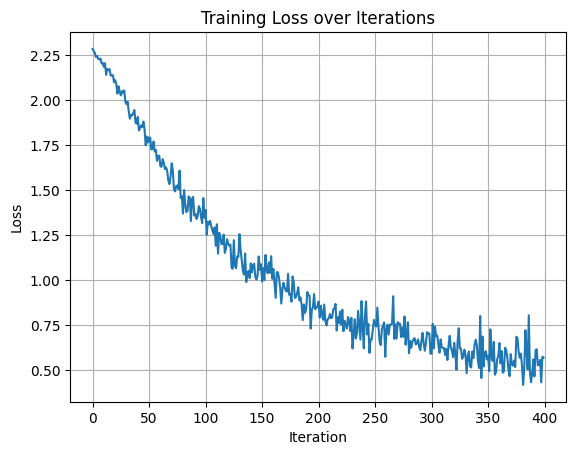

In [ ]:
#loss 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()